In [1]:
# Importando as bibliotecas utilizadas
import yfinance as yf # utilizada para obter dados de ações do yahoo finance
import numpy as np # utilizada para trabalharmos com séries de dados
import pandas as pd # utilizada para trabalharmos com dataframes
import seaborn as sns # utilizada para visualização de dados
import matplotlib.pyplot as plt # utilizada visualização de dados
import matplotlib.ticker as mtick # utilizado para conversão de valores nos eixos de gráficos

In [2]:
# Lendo arquivo com carteira teórica do ibovespa
ibovespa = pd.read_csv('IBOVDia_21-10-22.csv', encoding = 'ISO-8859-1',skiprows=1,sep=';',index_col=False,decimal=',',thousands='.')
ibovespa.set_index('Código',inplace=True)
ibovespa.head()

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
RRRP3,3R PETROLEUM,ON NM,2.004539e+08,0.405
ALPA4,ALPARGATAS,PN N1,2.027660e+08,0.192
ABEV3,AMBEV S/A,ON,4.386653e+09,2.987
AMER3,AMERICANAS,ON NM,5.960863e+08,0.382
ARZZ3,AREZZO CO,ON NM,6.035803e+07,0.272


In [3]:
# Checando formato dos dados
ibovespa.dtypes

Ação              object
Tipo              object
Qtde. Teórica    float64
Part. (%)        float64
dtype: object

In [4]:
# Retirando linhas finais que não representam ocorrências
ibovespa.drop(['Quantidade Teórica Total','Redutor'],inplace=True)

In [5]:
# Selecionando códigos da carteira teórica
codigos = list(ibovespa.index.values)
# Convertendo em tickers para consulta em yfinance
tickers = [str(x)+'.SA' for x in codigos]
# Adicionando índice de mercado
tickers.append('^BVSP')
display(tickers)

['RRRP3.SA',
 'ALPA4.SA',
 'ABEV3.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BPAN4.SA',
 'BBSE3.SA',
 'BRML3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'BRKM5.SA',
 'BRFS3.SA',
 'BPAC11.SA',
 'CRFB3.SA',
 'CCRO3.SA',
 'CMIG4.SA',
 'CIEL3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CPFE3.SA',
 'CMIN3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENGI11.SA',
 'ENEV3.SA',
 'EGIE3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'NTCO3.SA',
 'SOMA3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'RENT3.SA',
 'LWSA3.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'CASH3.SA',
 'BEEF3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PRIO3.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RAIL3.SA',
 'SBSP3.SA',
 'SANB11.SA',
 'SMTO3

In [6]:
# Fazendo download do histórico de preço da lista de tickers
precos = yf.download(tickers,start='2020-10-08',end='2022-10-23')['Adj Close']
precos.head()

[*********************100%***********************]  93 of 93 completed


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-08,12.766171,39.945183,85.482994,54.873844,NaN,25.129999,16.589947,27.265755,14.536620,15.717467,...,26.974434,17.958910,9.041203,47.699020,17.822651,18.389999,38.846603,36.546387,27.197021,97920.0
2020-10-09,12.663518,39.826508,87.276962,52.999638,NaN,25.299999,16.547600,27.082527,14.506332,15.785968,...,26.541899,17.640720,8.865985,47.940273,17.621019,18.910000,38.533813,37.382507,26.737877,97483.0
2020-10-13,12.831495,39.905624,93.149017,52.893364,NaN,25.190001,16.574823,27.091251,14.513906,15.877304,...,27.367647,17.406759,8.892267,48.360535,17.884020,19.440001,38.646763,38.476280,26.034506,98503.0
2020-10-14,12.878156,40.103420,93.727402,52.854717,NaN,25.809999,17.052710,26.916750,14.544188,15.892531,...,27.868992,17.247665,8.962355,49.029823,18.059351,19.270000,38.490364,39.171429,25.927048,99334.0
2020-10-15,12.542203,40.696815,92.678474,51.965919,NaN,25.730000,16.819815,27.099977,14.513906,15.785968,...,27.957466,17.612644,9.505529,48.617355,17.770050,19.459999,38.577263,39.263786,26.073584,99054.0


In [7]:
# Transformando histórico de preços em histórico de retornos diários
retornos = precos.pct_change()
retornos.head()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,-0.008041,-0.002971,0.020986,-0.034155,NaN,0.006765,-0.002553,-0.006720,-0.002084,0.004358,...,-0.016035,-0.017718,-0.019380,0.005058,-0.011313,0.028276,-0.008052,0.022878,-0.016882,-0.004463
2020-10-13,0.013265,0.001987,0.067281,-0.002005,NaN,-0.004348,0.001645,0.000322,0.000522,0.005786,...,0.031111,-0.013263,0.002964,0.008766,0.014925,0.028028,0.002931,0.029259,-0.026306,0.010463
2020-10-14,0.003636,0.004957,0.006209,-0.000731,NaN,0.024613,0.028832,-0.006441,0.002086,0.000959,...,0.018319,-0.009140,0.007882,0.013840,0.009804,-0.008745,-0.004047,0.018067,-0.004128,0.008436
2020-10-15,-0.026087,0.014797,-0.011191,-0.016816,NaN,-0.003100,-0.013657,0.006807,-0.002082,-0.006705,...,0.003175,0.021161,0.060606,-0.008413,-0.016019,0.009860,0.002258,0.002358,0.005652,-0.002819


In [8]:
# Removendo o primeiro dia de histórico, que terá retorno nulo
retornos = retornos.drop(retornos.index[0])
retornos.head()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-09,-0.008041,-0.002971,0.020986,-0.034155,NaN,0.006765,-0.002553,-0.006720,-0.002084,0.004358,...,-0.016035,-0.017718,-0.019380,0.005058,-0.011313,0.028276,-0.008052,0.022878,-0.016882,-0.004463
2020-10-13,0.013265,0.001987,0.067281,-0.002005,NaN,-0.004348,0.001645,0.000322,0.000522,0.005786,...,0.031111,-0.013263,0.002964,0.008766,0.014925,0.028028,0.002931,0.029259,-0.026306,0.010463
2020-10-14,0.003636,0.004957,0.006209,-0.000731,NaN,0.024613,0.028832,-0.006441,0.002086,0.000959,...,0.018319,-0.009140,0.007882,0.013840,0.009804,-0.008745,-0.004047,0.018067,-0.004128,0.008436
2020-10-15,-0.026087,0.014797,-0.011191,-0.016816,NaN,-0.003100,-0.013657,0.006807,-0.002082,-0.006705,...,0.003175,0.021161,0.060606,-0.008413,-0.016019,0.009860,0.002258,0.002358,0.005652,-0.002819
2020-10-16,-0.012649,0.014581,-0.016289,-0.001116,NaN,-0.008939,-0.022838,-0.025435,-0.026604,-0.019768,...,0.015471,0.006908,0.043318,-0.003682,0.008387,-0.004625,-0.020045,0.015847,-0.032971,-0.007521


In [9]:
# Estatísticas sumárias do histórico de retornos diários de cada ação do ibovespa
retornos.describe()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
count,504.000000,504.000000,504.000000,504.000000,412.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,0.000531,-0.000868,-0.002642,0.001458,0.000884,-0.000034,0.000037,0.001180,0.000529,0.000744,...,0.000623,-0.000193,0.000169,0.001132,0.000314,-0.002771,0.000148,0.000188,-0.000964,0.000488
std,0.018565,0.028554,0.041963,0.023100,0.020410,0.038501,0.023974,0.019975,0.018759,0.019786,...,0.025563,0.026921,0.030387,0.022728,0.022200,0.038921,0.013572,0.022983,0.033957,0.013090
min,-0.057010,-0.135389,-0.130408,-0.078099,-0.092199,-0.180027,-0.083799,-0.116457,-0.087970,-0.085827,...,-0.111249,-0.123343,-0.077447,-0.075913,-0.072178,-0.124823,-0.046767,-0.077278,-0.117610,-0.051201
25%,-0.010723,-0.016667,-0.027117,-0.011103,-0.011563,-0.020264,-0.015811,-0.009149,-0.009959,-0.010442,...,-0.014703,-0.015825,-0.018927,-0.014365,-0.014687,-0.029838,-0.007917,-0.012549,-0.021687,-0.007271
50%,0.000000,-0.001354,-0.005947,-0.000596,0.000456,-0.002837,-0.001341,0.000315,0.000402,0.000000,...,0.000000,-0.002225,-0.001217,0.000228,-0.000050,-0.004597,-0.000201,-0.001071,-0.002715,0.000759
75%,0.010417,0.013860,0.019399,0.013726,0.012959,0.018674,0.014375,0.012425,0.010571,0.011773,...,0.016195,0.014794,0.017513,0.014432,0.012986,0.017424,0.007304,0.012445,0.016397,0.008736
max,0.097241,0.166537,0.224866,0.160358,0.089431,0.184342,0.080750,0.076324,0.091053,0.094988,...,0.077682,0.150932,0.097175,0.079866,0.095694,0.144654,0.068118,0.081710,0.141002,0.055409


In [10]:
# Separando o índice de mercado das demais ações
indice_mercado = retornos['^BVSP']
retornos = retornos.drop('^BVSP', axis=1)

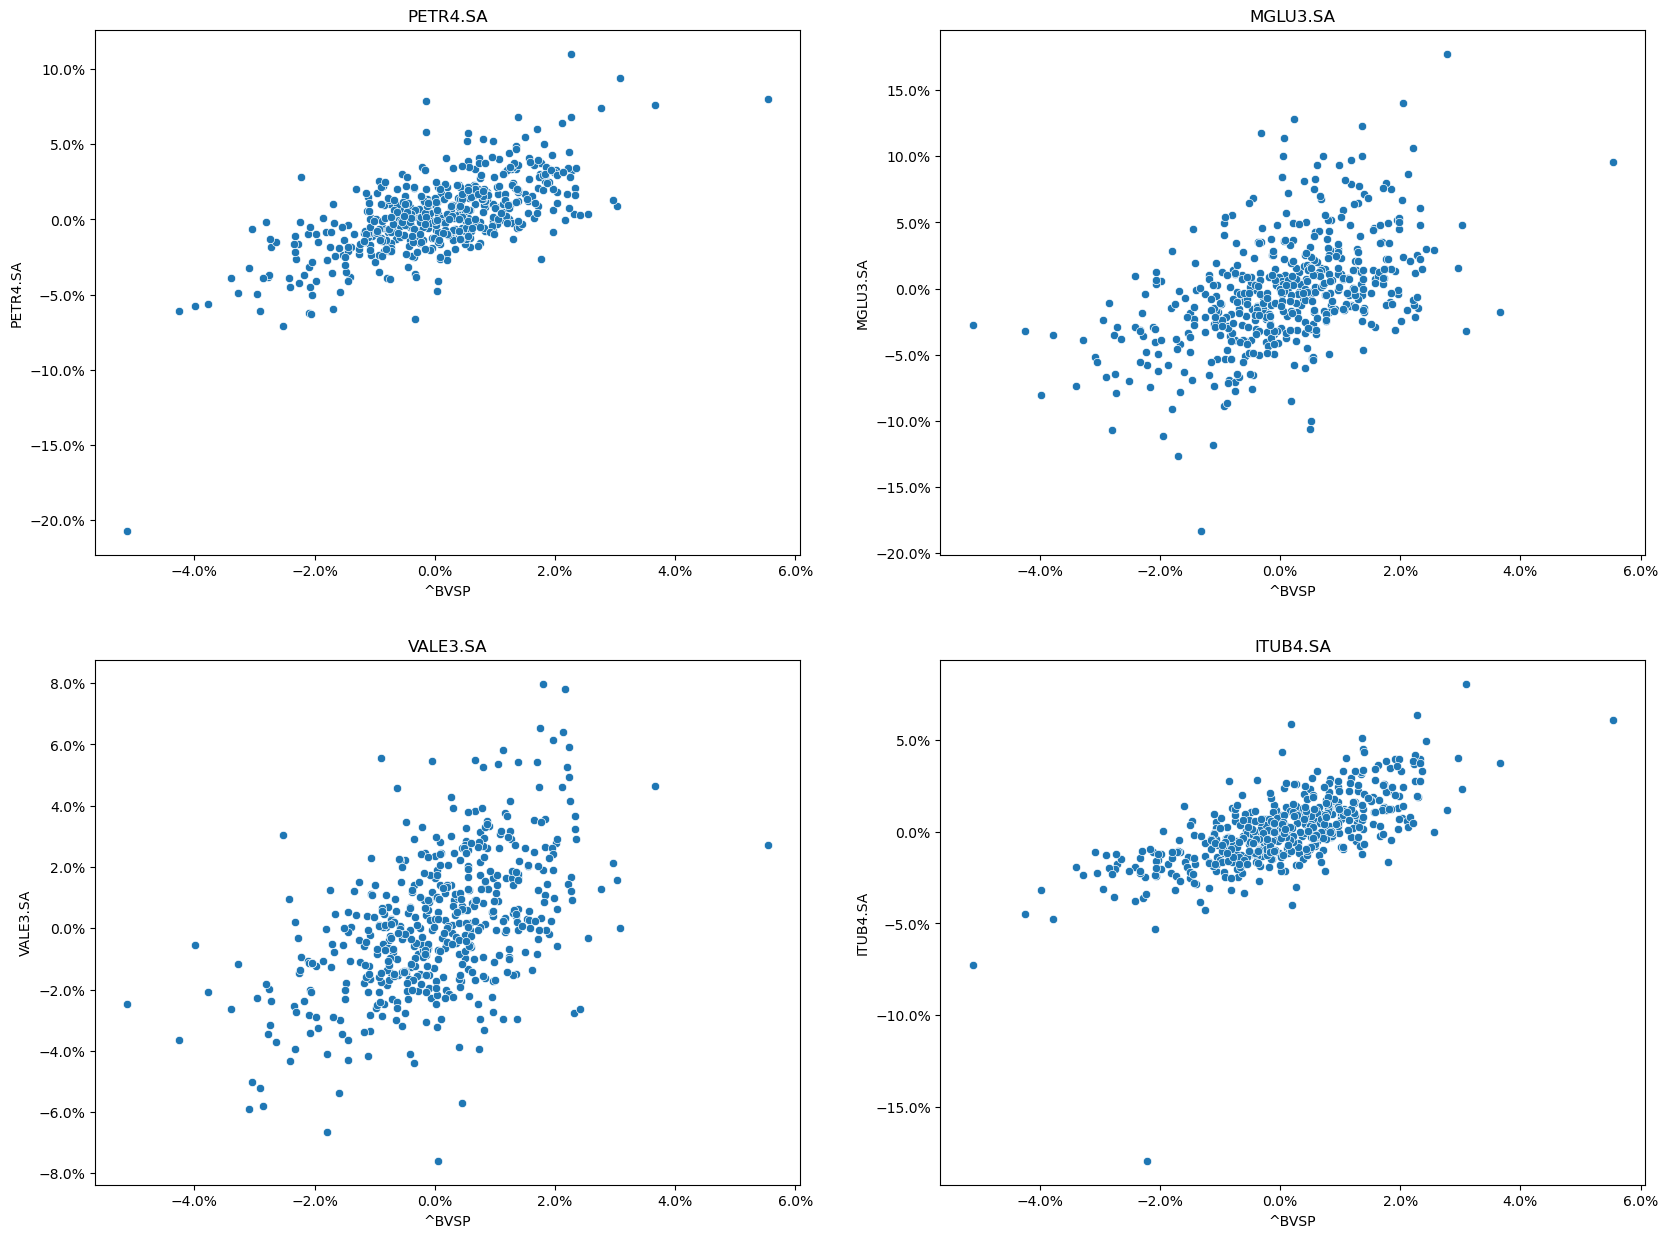

In [11]:
# Criando visualização da distribuição entre retornos das ações e do mercado
fig, axes = plt.subplots(2,2,figsize=(20,15))

for ticker, ax in zip(['PETR4.SA','MGLU3.SA','VALE3.SA','ITUB4.SA'],axes.ravel()):
    sns.scatterplot(ax=ax,x=indice_mercado,y=retornos[ticker])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
    ax.set_title(ticker)

In [12]:
# Definindo função para calcular regressão linear
def regressao(retornos_mercado,retornos_acao):
    x_values = np.array(retornos_mercado)
    y_values = np.array(retornos_acao)

    x_avg = np.mean(x_values)
    y_avg = np.mean(y_values)


    x_diff = x_values - x_avg
    y_diff = y_values - y_avg
    composite = x_diff * y_diff

    x_diff_sqr = x_diff**2
    y_diff_sqr = y_diff**2

    slope = np.sum(composite)/np.sum(x_diff_sqr)
    y_intercept = y_avg - slope*x_avg
    
    y_predictions = slope * x_values + y_intercept
    residuals = y_values - y_predictions
    residuals_squared = residuals**2
    
    r_squared = 1 - np.sum(residuals_squared)/np.sum(y_diff_sqr)
    
    return (slope,y_intercept,r_squared)
    

In [13]:
# Inicializando dataframe para receber dados das regressões
regressoes = pd.DataFrame(columns=['Beta','Intercepto','R_Quadrado'])

# Calculando a regressão para as ações da carteira teórica do ibovespa
for ticker in retornos.columns.values:
    resultado = regressao(indice_mercado,retornos[ticker])
    regressoes.loc[ticker] = [resultado[0],resultado[1],resultado[2]]

In [14]:
# Estatísticas sumárias dos componentes das regressões
regressoes.describe()

,Beta,Intercepto,R_Quadrado
count,85.000000,85.000000,85.000000
mean,1.002729,-0.000096,0.273012
std,0.345701,0.001283,0.118606
min,0.337716,-0.003976,0.046179
25%,0.764454,-0.000789,0.191259
50%,1.012108,0.000054,0.265794
75%,1.216485,0.000656,0.360160
max,1.881924,0.003139,0.589385


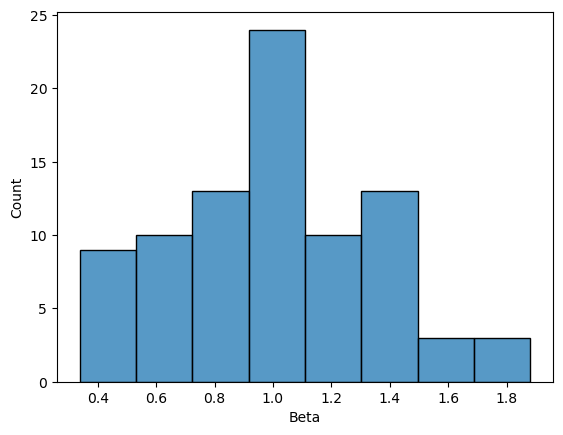

In [15]:
# Visualizando a distribuição dos Betas
plt.clf()
sns.histplot(regressoes['Beta'])
plt.show()

In [16]:
# Visualizando maiores e menores betas
display(regressoes['Beta'].nlargest(5))
display(regressoes['Beta'].nsmallest(5))

GOLL4.SA    1.881924
AZUL4.SA    1.824916
CVCB3.SA    1.797256
VIIA3.SA    1.605862
BPAN4.SA    1.575888
Name: Beta, dtype: float64

VIVT3.SA     0.337716
SUZB3.SA     0.356443
TAEE11.SA    0.371259
JBSS3.SA     0.397330
KLBN11.SA    0.398214
Name: Beta, dtype: float64

<Figure size 640x480 with 0 Axes>

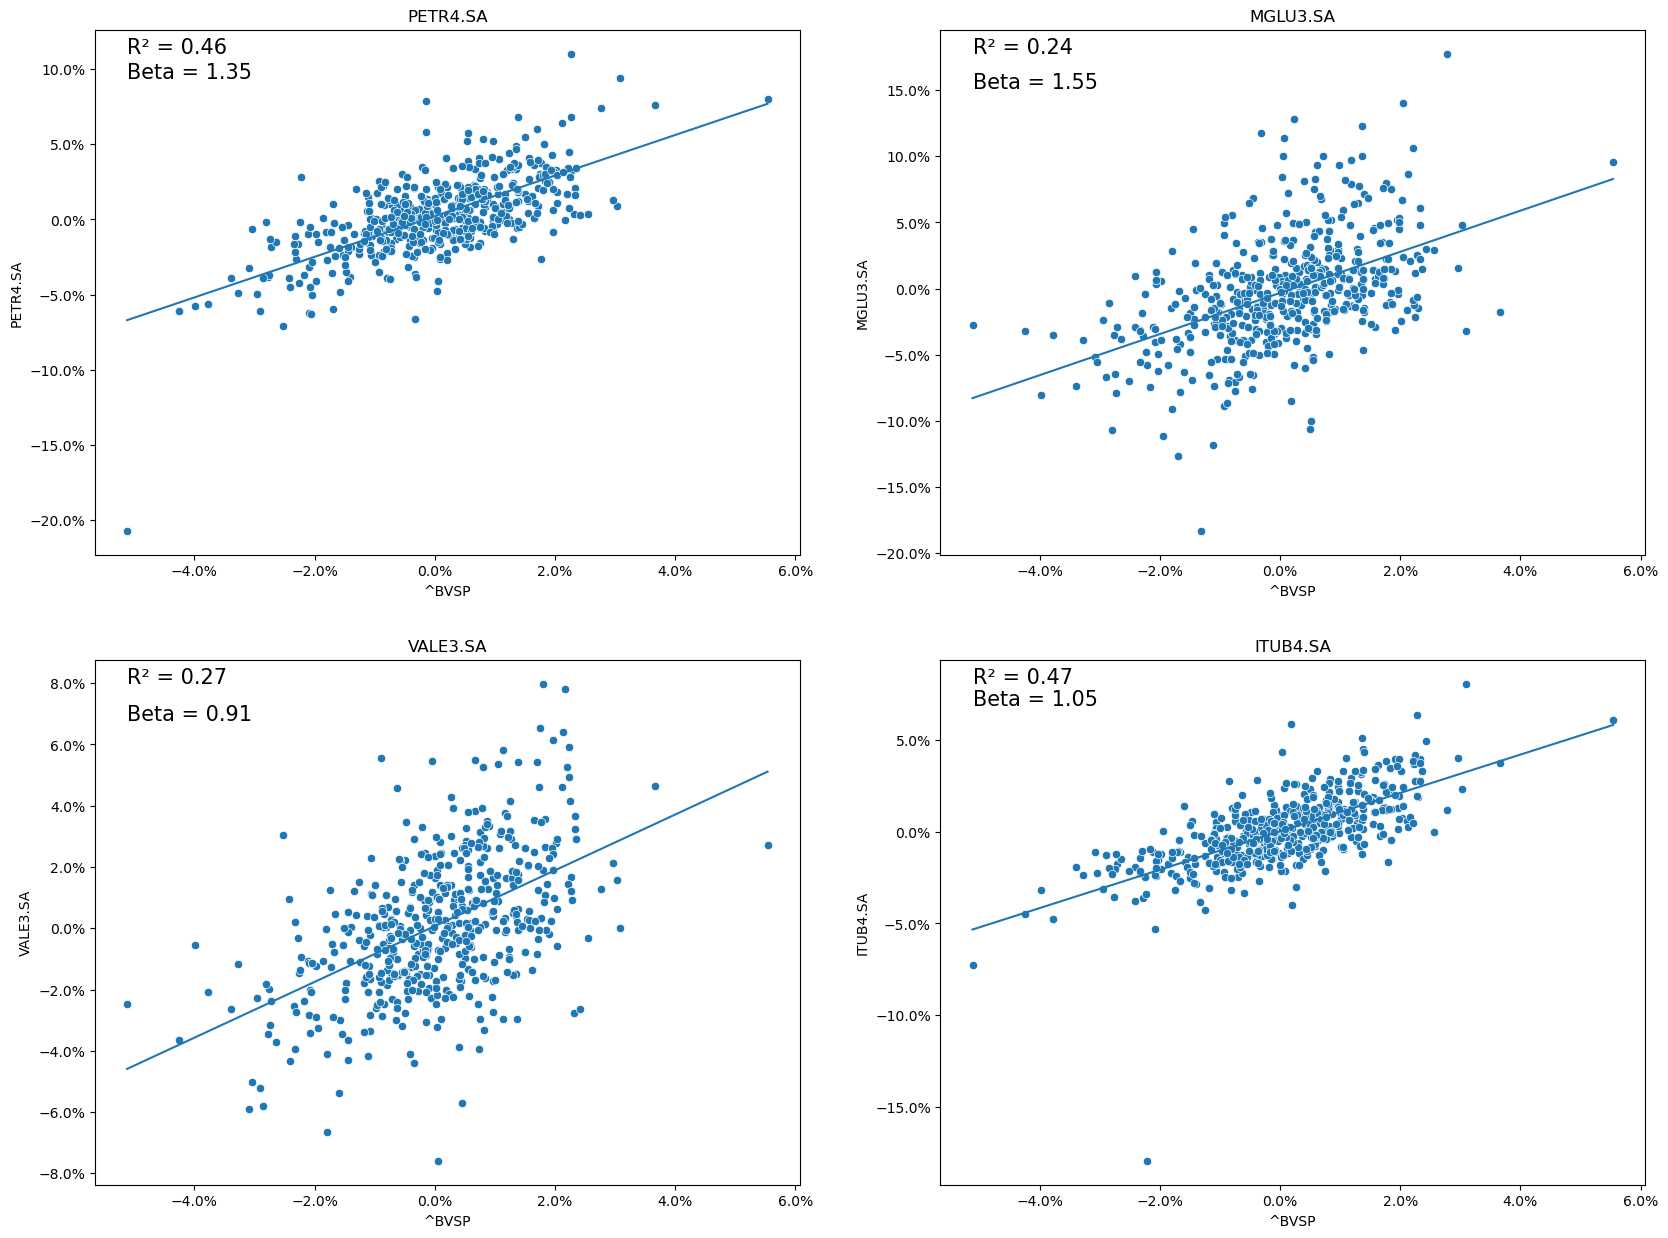

In [17]:
# Criando visualização da distribuição entre retornos das ações e do mercado + regressão 
plt.clf()
fig, axes = plt.subplots(2,2,figsize=(20,15))

for ticker, ax in zip(['PETR4.SA','MGLU3.SA','VALE3.SA','ITUB4.SA'],axes.ravel()):
    sns.scatterplot(ax=ax,x=indice_mercado,y=retornos[ticker])
    regression_equation = regressoes['Beta'].loc[ticker]*indice_mercado + regressoes['Intercepto'].loc[ticker]
    sns.lineplot(ax=ax, x=indice_mercado, y=regression_equation)
    ax.set_title(ticker)
    ax.annotate('R² = '+str(round(regressoes['R_Quadrado'].loc[ticker],2)),(indice_mercado.min(),retornos[ticker].max()),fontsize=15)
    ax.annotate('Beta = '+str(round(regressoes['Beta'].loc[ticker],2)),(indice_mercado.min(),retornos[ticker].max()*0.85),fontsize=15)    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
                 
plt.show()

In [18]:
# Visualizando maiores e menores R²
display(regressoes['R_Quadrado'].nlargest(5))
display(regressoes['R_Quadrado'].nsmallest(5))

ITSA4.SA    0.589385
BBDC3.SA    0.525386
BBAS3.SA    0.495569
BBDC4.SA    0.483576
ITUB4.SA    0.469567
Name: R_Quadrado, dtype: float64

PCAR3.SA    0.046179
SUZB3.SA    0.048686
MRFG3.SA    0.051526
SLCE3.SA    0.070851
JBSS3.SA    0.072669
Name: R_Quadrado, dtype: float64